In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalize the images to [0, 1] by dividing by 255
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the 28x28 images to 1D vectors of size 784
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the neural network architecture
def create_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Set hyperparameters
batch_size = 128
epochs = 10

# Define optimizers
optimizers = {
    "GD": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
    "SGD": tf.keras.optimizers.SGD(learning_rate=0.01),
    "SGD with Momentum": tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "Mini-Batch GD": tf.keras.optimizers.SGD(learning_rate=0.01),  # SGD will be used with batch size as mini-batch
    "Adagrad": tf.keras.optimizers.Adagrad(learning_rate=0.01),
    "RMSProp": tf.keras.optimizers.RMSprop(learning_rate=0.001),
    "AdaDelta": tf.keras.optimizers.Adadelta(learning_rate=1.0),
    "Adam": tf.keras.optimizers.Adam(learning_rate=0.001)
}

# Store results
history_dict = {}

# Train and evaluate the model with each optimizer
for opt_name, optimizer in optimizers.items():
    print(f"Training with {opt_name} optimizer...")
    model = create_model()
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, validation_data=(X_test, y_test))
    
    # Store the results (loss and accuracy)
    history_dict[opt_name] = history.history



Training with GD optimizer...
Epoch 1/10
469/469 - 1s - loss: 1.2016 - accuracy: 0.7016 - val_loss: 0.6544 - val_accuracy: 0.8547 - 589ms/epoch - 1ms/step
Epoch 2/10
469/469 - 0s - loss: 0.5562 - accuracy: 0.8655 - val_loss: 0.4573 - val_accuracy: 0.8844 - 464ms/epoch - 989us/step
Epoch 3/10
469/469 - 0s - loss: 0.4396 - accuracy: 0.8855 - val_loss: 0.3894 - val_accuracy: 0.8983 - 437ms/epoch - 932us/step
Epoch 4/10
469/469 - 0s - loss: 0.3887 - accuracy: 0.8953 - val_loss: 0.3535 - val_accuracy: 0.9043 - 456ms/epoch - 972us/step
Epoch 5/10
469/469 - 0s - loss: 0.3585 - accuracy: 0.9022 - val_loss: 0.3298 - val_accuracy: 0.9106 - 412ms/epoch - 878us/step
Epoch 6/10
469/469 - 0s - loss: 0.3374 - accuracy: 0.9072 - val_loss: 0.3130 - val_accuracy: 0.9160 - 395ms/epoch - 843us/step
Epoch 7/10
469/469 - 0s - loss: 0.3212 - accuracy: 0.9110 - val_loss: 0.2999 - val_accuracy: 0.9183 - 389ms/epoch - 829us/step
Epoch 8/10
469/469 - 0s - loss: 0.3081 - accuracy: 0.9140 - val_loss: 0.2880 - val_

Epoch 4/10
469/469 - 1s - loss: 0.1019 - accuracy: 0.9711 - val_loss: 0.1014 - val_accuracy: 0.9698 - 587ms/epoch - 1ms/step
Epoch 5/10
469/469 - 1s - loss: 0.0844 - accuracy: 0.9764 - val_loss: 0.0913 - val_accuracy: 0.9725 - 591ms/epoch - 1ms/step
Epoch 6/10
469/469 - 1s - loss: 0.0721 - accuracy: 0.9795 - val_loss: 0.0884 - val_accuracy: 0.9727 - 586ms/epoch - 1ms/step
Epoch 7/10
469/469 - 1s - loss: 0.0630 - accuracy: 0.9819 - val_loss: 0.0845 - val_accuracy: 0.9729 - 580ms/epoch - 1ms/step
Epoch 8/10
469/469 - 1s - loss: 0.0551 - accuracy: 0.9844 - val_loss: 0.0777 - val_accuracy: 0.9758 - 583ms/epoch - 1ms/step
Epoch 9/10
469/469 - 1s - loss: 0.0486 - accuracy: 0.9865 - val_loss: 0.0766 - val_accuracy: 0.9765 - 596ms/epoch - 1ms/step
Epoch 10/10
469/469 - 1s - loss: 0.0440 - accuracy: 0.9875 - val_loss: 0.0750 - val_accuracy: 0.9769 - 635ms/epoch - 1ms/step
Training with Adam optimizer...
Epoch 1/10
469/469 - 1s - loss: 0.3522 - accuracy: 0.9025 - val_loss: 0.1915 - val_accuracy:

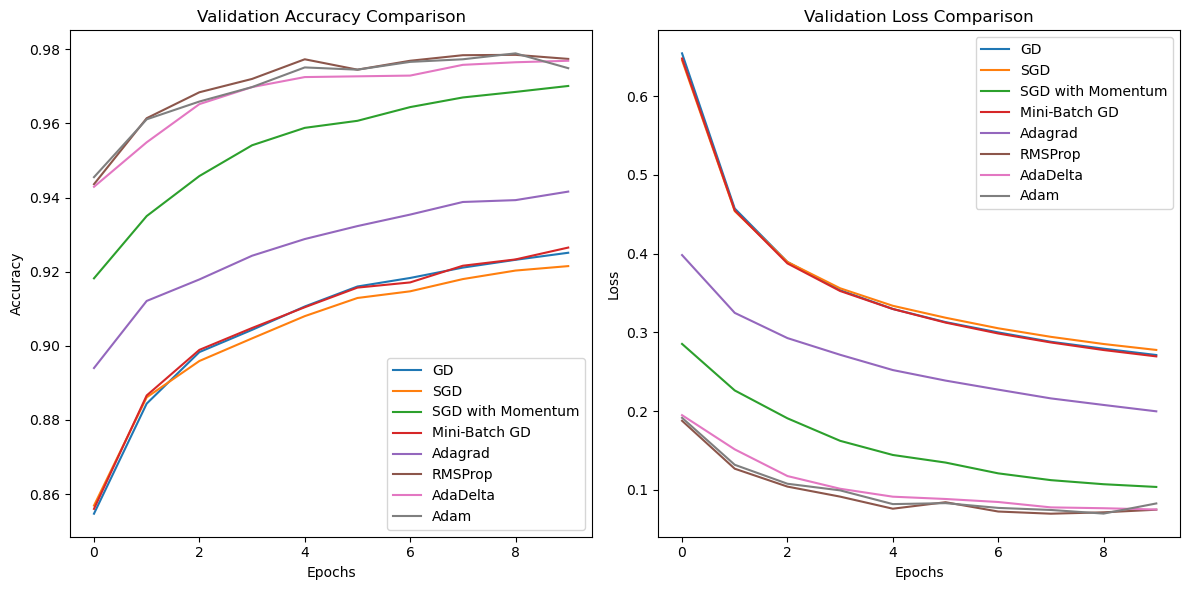

GD: Final Accuracy = 0.9251, Final Loss = 0.2712
SGD: Final Accuracy = 0.9215, Final Loss = 0.2777
SGD with Momentum: Final Accuracy = 0.9701, Final Loss = 0.1037
Mini-Batch GD: Final Accuracy = 0.9265, Final Loss = 0.2695
Adagrad: Final Accuracy = 0.9416, Final Loss = 0.1997
RMSProp: Final Accuracy = 0.9774, Final Loss = 0.0747
AdaDelta: Final Accuracy = 0.9769, Final Loss = 0.0750
Adam: Final Accuracy = 0.9749, Final Loss = 0.0827


In [3]:
# Plot the results
plt.figure(figsize=(12, 6))

# Plot accuracy comparison
plt.subplot(1, 2, 1)
for opt_name in optimizers:
    plt.plot(history_dict[opt_name]['val_accuracy'], label=opt_name)
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss comparison
plt.subplot(1, 2, 2)
for opt_name in optimizers:
    plt.plot(history_dict[opt_name]['val_loss'], label=opt_name)
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Print final results
for opt_name in optimizers:
    final_acc = history_dict[opt_name]['val_accuracy'][-1]
    final_loss = history_dict[opt_name]['val_loss'][-1]
    print(f"{opt_name}: Final Accuracy = {final_acc:.4f}, Final Loss = {final_loss:.4f}")
